# Clustering

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [2]:
customer = pd.read_csv("/content/drive/MyDrive/DQlab/Machine Learning & AI - Batch 15/Day 8 - Clustering/customer.csv")
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  1175 non-null   int64
 1   age          1175 non-null   int64
 2   spending     1175 non-null   int64
dtypes: int64(3)
memory usage: 27.7 KB


In [3]:
status = pd.read_csv("/content/drive/MyDrive/DQlab/Machine Learning & AI - Batch 15/Day 8 - Clustering/fb_live.csv")
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4288 entries, 0 to 4287
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_id      4288 non-null   int64
 1   num_reactions  4288 non-null   int64
 2   num_comments   4288 non-null   int64
 3   num_shares     4288 non-null   int64
 4   num_likes      4288 non-null   int64
 5   num_loves      4288 non-null   int64
 6   num_wows       4288 non-null   int64
 7   num_hahas      4288 non-null   int64
 8   num_sads       4288 non-null   int64
 9   num_angrys     4288 non-null   int64
dtypes: int64(10)
memory usage: 335.1 KB


In [4]:
wine = pd.read_csv("/content/drive/MyDrive/DQlab/Machine Learning & AI - Batch 15/Day 8 - Clustering/wine_quality.csv")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [5]:
# cuplikan data customer
customer.head()

,customer_id,age,spending
0,1,51,4339
1,2,48,4700
2,3,10,1352
3,4,37,2457
4,5,42,1266


In [6]:
# cuplikan data status
status.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2,150,0,0,150,0,0,0,0,0
1,4,111,0,0,111,0,0,0,0,0
2,5,213,0,0,204,9,0,0,0,0
3,6,217,6,0,211,5,1,0,0,0
4,9,203,1,0,198,5,0,0,0,0


In [7]:
# cuplikan data wine
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Agglomerative Clustering

In [9]:
customer.head()

,customer_id,age,spending
0,1,51,4339
1,2,48,4700
2,3,10,1352
3,4,37,2457
4,5,42,1266


In [8]:
# checck missing value
customer.isna().sum()

,0
customer_id,0
age,0
spending,0


Tidak ada missing value. Good

In [10]:
# check duplicated id
customer.duplicated(subset="customer_id").sum()

0

Tidak ada duplicated ID. Good

In [11]:
# drop kolom ID karena tidak bermakna
customer = customer.drop(columns="customer_id")

In [12]:
# deskripsi statistik
customer.describe()

,age,spending
count,1175.000000,1175.00000
mean,42.101277,4394.18383
std,16.988847,3220.41770
min,10.000000,0.00000
25%,30.000000,2395.50000
50%,41.000000,3666.00000
75%,55.000000,5138.50000
max,77.000000,17423.00000


Terdapat perbedaan skala: wajib feature scaling

In [13]:
# minmax scaler sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
customer_scaled = scaler.fit_transform(customer)

pd.DataFrame(customer_scaled).describe()

,0,1
count,1175.000000,1175.000000
mean,0.479124,0.252206
std,0.253565,0.184837
min,0.000000,0.000000
25%,0.298507,0.137491
50%,0.462687,0.210412
75%,0.671642,0.294926
max,1.000000,1.000000


In [14]:
# train agglomerative clustering with 5 clusters, linkage="single"
from sklearn.cluster import AgglomerativeClustering
agg_clus_single = AgglomerativeClustering(n_clusters=5,linkage="single")
agg_clus_single.fit(customer_scaled)

AgglomerativeClustering(linkage='single', n_clusters=5)

In [15]:
# assign clusters to customer dataframe
customer["label_single"] = agg_clus_single.labels_
customer.head()

,age,spending,label_single
0,51,4339,0
1,48,4700,0
2,10,1352,0
3,37,2457,0
4,42,1266,0


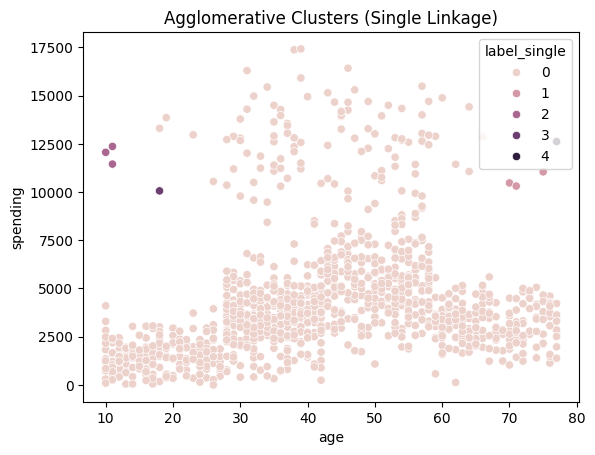

In [16]:
# draw as scatter plot
sns.scatterplot(data=customer, x="age",y="spending",hue="label_single")
plt.title("Agglomerative Clusters (Single Linkage)")
plt.show()

Hasil segmentasi tidak praktikal! Nyaris semua customers dikelompokkan menjadi cluster 0

In [17]:
# train agglomerative clustering with 5 clusters, linkage="ward"
from sklearn.cluster import AgglomerativeClustering
agg_clus_ward = AgglomerativeClustering(n_clusters=5,linkage="ward")
agg_clus_ward.fit(customer_scaled)

AgglomerativeClustering(n_clusters=5)

In [18]:
# assign clusters to customer dataframe
customer["label_ward"] = agg_clus_ward.labels_
customer.head()

,age,spending,label_single,label_ward
0,51,4339,0,1
1,48,4700,0,4
2,10,1352,0,3
3,37,2457,0,0
4,42,1266,0,0


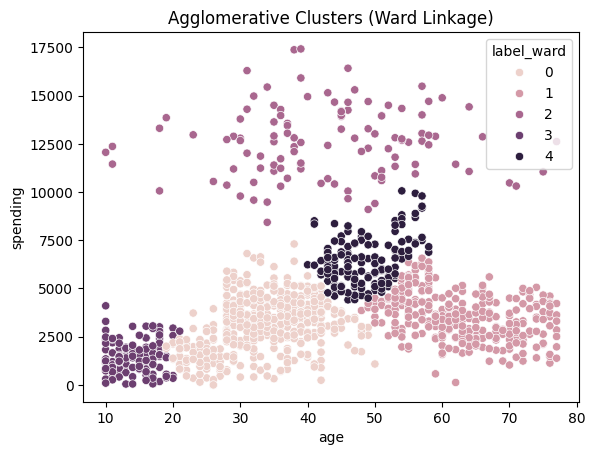

In [19]:
# draw as scatter plot
sns.scatterplot(data=customer, x="age",y="spending",hue="label_ward")
plt.title("Agglomerative Clusters (Ward Linkage)")
plt.show()

Tampak jauh lebih baik.
<br>
Interpretasi clusters?

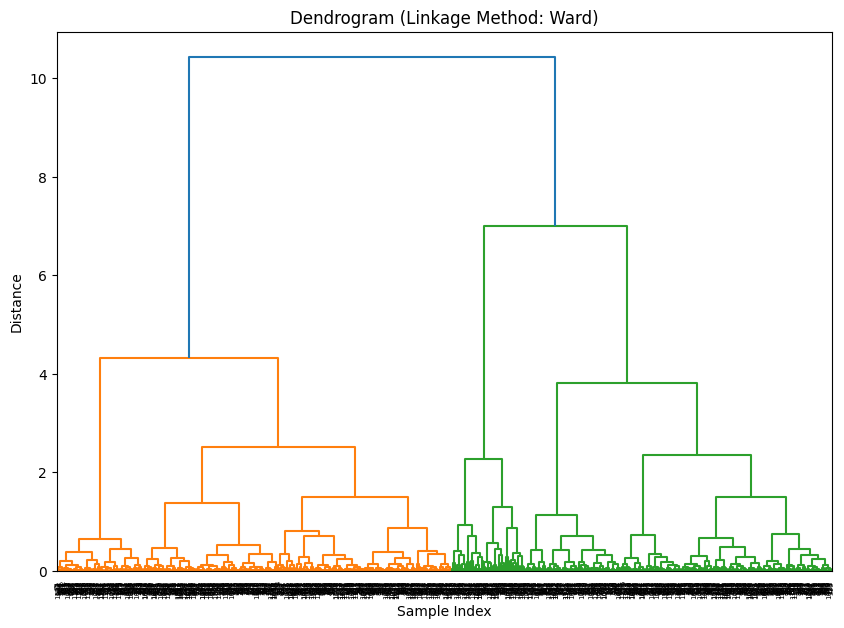

In [20]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Less useful, to be honest~

In [21]:
# exercise: coba gunakan linkage method "average"

In [22]:
# exercise: coba gunakan linkage method "complete"

## K-Means Clustering

In [23]:
status.head()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,2,150,0,0,150,0,0,0,0,0
1,4,111,0,0,111,0,0,0,0,0
2,5,213,0,0,204,9,0,0,0,0
3,6,217,6,0,211,5,1,0,0,0
4,9,203,1,0,198,5,0,0,0,0


Note: kolom num_reactions adalah penjumlahan dari kolom-kolom di sebelah kanan (likes ke-kanan). Jadi tidak membawa informasi baru --> akan kita drop

In [24]:
# check missing values
status.isna().sum()

,0
status_id,0
num_reactions,0
num_comments,0
num_shares,0
num_likes,0
num_loves,0
num_wows,0
num_hahas,0
num_sads,0
num_angrys,0


Tidak ada missing values

In [25]:
# Check duplikasi ID
status.duplicated(subset="status_id").sum()

0

Tidak ada duplikasi ID

In [26]:
# drop customer_id & num_reactions columns
status = status.drop(columns=["status_id","num_reactions"])

In [27]:
# minmax scaler columns
scaler = MinMaxScaler()
status_scaled = scaler.fit_transform(status)

pd.DataFrame(status_scaled).describe()

,0,1,2,3,4,5,6,7
count,4288.000000,4288.000000,4288.000000,4288.000000,4288.000000,4288.000000,4288.000000,4288.000000
mean,0.001569,0.002027,0.037957,0.012043,0.018018,0.001967,0.002794,0.001474
std,0.015922,0.017649,0.093630,0.037076,0.061629,0.022940,0.032641,0.024391
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.003185,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000196,0.000000,0.007219,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000883,0.000794,0.026539,0.008333,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
# elbow method
from sklearn.cluster import KMeans

# track sum of squared error
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(status_scaled)
    sse.append(kmeans.inertia_)

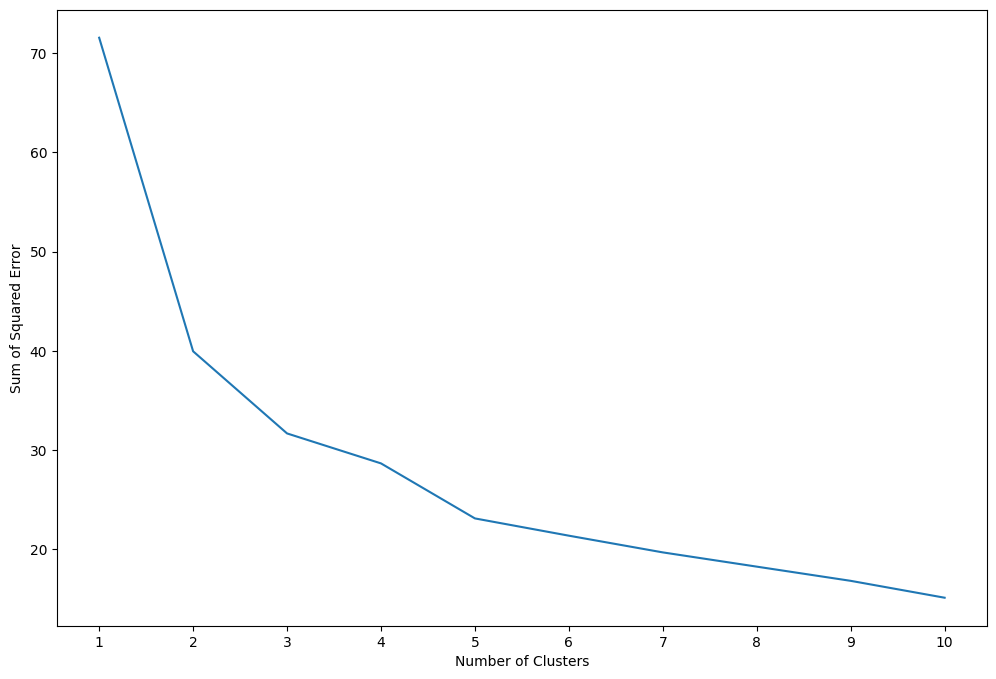

In [29]:
# draw the SSE decline progression
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

Optimal K = 3

In [30]:
# retrain k-means with optimal K
kmeans = KMeans(n_clusters=3)
kmeans.fit(status_scaled)

KMeans(n_clusters=3)

In [31]:
# assign obtained labels to status dataframe
status["label"] = kmeans.labels_
status.head()

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,label
0,0,0,150,0,0,0,0,0,0
1,0,0,111,0,0,0,0,0,0
2,0,0,204,9,0,0,0,0,0
3,6,0,211,5,1,0,0,0,0
4,1,0,198,5,0,0,0,0,0


In [32]:
kmeans.cluster_centers_

array([[ 9.98160172e-04,  1.33165158e-03,  1.68296470e-02,
         8.72457946e-03,  9.44804894e-03,  1.52969709e-03,
         2.70266279e-03,  1.24723624e-03],
       [ 5.40390737e-03,  1.42727036e-02,  4.21427494e-01,
         2.54553734e-02,  3.23554789e-02,  1.97171990e-03,
         7.50026787e-04, -1.30104261e-18],
       [ 1.44499979e-02,  6.35571168e-03,  1.52514705e-01,
         1.00273224e-01,  2.76315789e-01,  1.62244381e-02,
         8.83960141e-03,  1.11052353e-02]])

In [33]:
# centroid analysis
status['status_id'] = status.index + 1
centroid_df = status.groupby('label')[['num_comments', 'num_shares', 'num_likes',
       'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys','status_id']].agg({'num_comments': 'mean',
                                                                                         'num_shares':'mean',
                                                                                         'num_likes':'mean',
                                                                                         'num_loves': 'mean',
                                                                                         'num_wows': 'mean',
                                                                                         'num_hahas':'mean',
                                                                                         'num_sads': 'mean',
                                                                                         'num_angrys': 'mean',
                                                                                         'status_id':'count'}).reset_index()
centroid_df = centroid_df.rename(columns = {'status_id':'num_status'})
centroid_df

,label,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_status
0,0,10.175245,1.677881,79.267637,1.046950,0.359026,0.148381,0.137836,0.038664,3983
1,1,55.087432,17.983607,1984.923497,3.054645,1.229508,0.191257,0.038251,0.000000,183
2,2,147.303279,8.008197,718.344262,12.032787,10.500000,1.573770,0.450820,0.344262,122


Interpretasi clusters?

### Exercise: Train K-means on wine data

In [34]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
# mixmax scaler all columns

In [36]:
# elbow method

In [37]:
# draw the SSE decline progression


In [38]:
# retrain k-means with optimal n_cluster


In [39]:
# assign obtained labels to status dataframe


In [40]:
# calculate mean values of feature columns, group by label column

Interpretation?

# Selesai